In [18]:
import pandas as pd

# Charger les données
data = pd.read_csv('water_data_final.csv')

16:48:41 - cmdstanpy - INFO - Chain [1] start processing


Nombre total de données pour STN Code 1972: 5
Données filtrées :
     STN Code  Dissolved Oxygen             Location Name  Year    pH  \
18       1972              7.15  NALSAROVAR LAKE (SANAND)  2017  8.55   
161      1972              4.60  NALSAROVAR LAKE (SANAND)  2018  8.75   
304      1972              7.25  NALSAROVAR LAKE (SANAND)  2019  8.35   
520      1972              6.95  NALSAROVAR LAKE (SANAND)  2020  8.25   
774      1972              6.70  NALSAROVAR LAKE (SANAND)  2021  8.30   

     Conductivity    BOD  Nitrate N + Nitrite N  Fecal Coliform  \
18        13439.0  55.00                  0.245            22.5   
161       15807.5  49.00                  0.150             9.5   
304        1383.5   2.85                  0.150            68.5   
520        6750.5   9.40                  0.220            89.0   
774        6385.0  12.90                  0.540           286.5   

     Total Coliform         WQI        lat        lon  
18             65.5  553.124707  22.3

16:48:42 - cmdstanpy - INFO - Chain [1] done processing
c:\anaconda\envs\MLOPs\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


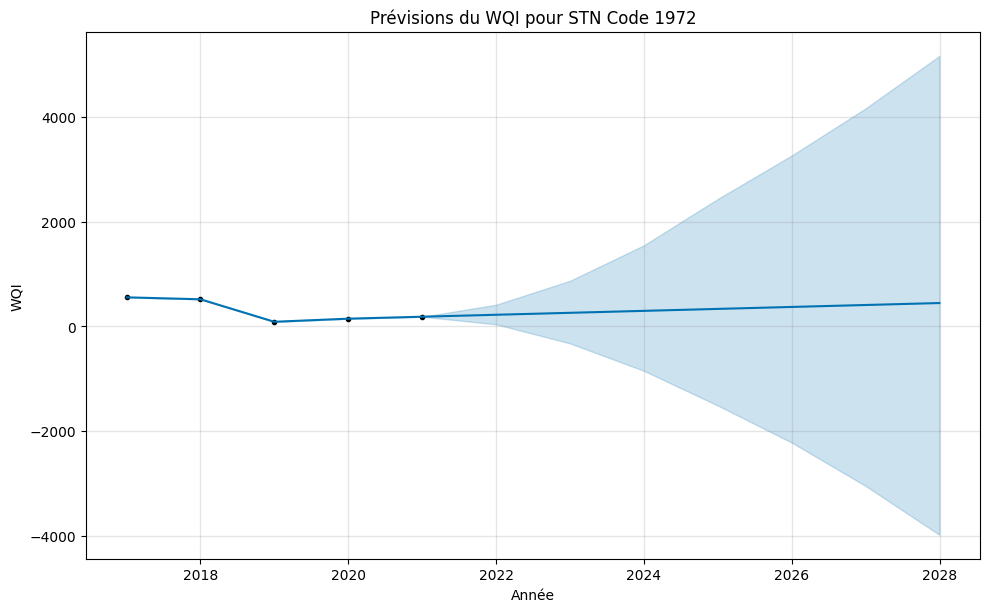

         Date  Prédiction  Limite Inférieure  Limite Supérieure
0  2017-01-01  553.124707         553.124707         553.124707
1  2018-01-01  515.972706         515.972706         515.972706
2  2019-01-01   85.890075          85.890075          85.890075
3  2020-01-01  145.247546         145.247546         145.247546
4  2021-01-01  182.689089         182.689089         182.689089
5  2021-12-31  219.926033          38.223487         411.364446
6  2022-12-31  257.265277        -325.723447         867.595731
7  2023-12-31  294.604520        -849.236283        1545.533793
8  2024-12-31  332.046063       -1514.466294        2433.363628
9  2025-12-31  369.385307       -2221.649211        3262.974824
10 2026-12-31  406.724551       -3050.386795        4163.224465
11 2027-12-31  444.063794       -3984.992006        5166.799766


In [72]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

def evaluate_model(data, stn_code, years_future=7):
    # Filtrer les données pour le STN Code donné
    data_filtered = data[data['STN Code'] == stn_code]

    # Vérifier les données filtrées
    if data_filtered.empty:
        raise ValueError(f"Pas de données disponibles pour le STN Code {stn_code}.")

    print(f"Nombre total de données pour STN Code {stn_code}: {len(data_filtered)}")
    print("Données filtrées :")
    print(data_filtered)

    # Préparer les données
    data_filtered = data_filtered.rename(columns={'Year': 'ds', 'WQI': 'y'})
    data_filtered['ds'] = pd.to_datetime(data_filtered['ds'], format='%Y')

    # Initialiser le modèle Prophet avec des ajustements
    model = Prophet(
        yearly_seasonality=False,  # Désactiver la saisonnalité annuelle si ce n'est pas nécessaire
        changepoint_prior_scale=1  # Réduire l'impact des changepoints pour rendre le modèle plus lisse
    )
    model.fit(data_filtered[['ds', 'y']])

    # Faire des prévisions
    future = model.make_future_dataframe(periods=years_future, freq='Y')
    forecast = model.predict(future)

    # Retourner les prévisions sous forme de tableau
    forecast_table = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
    forecast_table.columns = ['Date', 'Prédiction', 'Limite Inférieure', 'Limite Supérieure']
    
    return model, forecast, forecast_table

# Exemple d'utilisation
stn_code = 1972
data_cleaned = pd.read_csv("water_data_final.csv")  # Charger les données
model, forecast, forecast_table = evaluate_model(data_cleaned, stn_code)

# Afficher la courbe de prévisions
fig = model.plot(forecast)
plt.title(f"Prévisions du WQI pour STN Code {stn_code}")
plt.xlabel("Année")
plt.ylabel("WQI")

# Ajuster l'échelle de l'axe Y manuellement
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True, prune='lower', steps=[1, 2, 5, 10]))

# En option, ajuster manuellement la limite de l'axe Y si nécessaire
y_min, y_max = plt.gca().get_ylim()
plt.ylim([y_min, y_max])  # Ajuster l'échelle en fonction des données

plt.show()

# Afficher le tableau des prévisions
print(forecast_table)


16:45:24 - cmdstanpy - INFO - Chain [1] start processing
16:45:24 - cmdstanpy - INFO - Chain [1] done processing


Nombre total de données pour STN Code 1790: 5
Données filtrées :
     STN Code  Dissolved Oxygen  Location Name  Year    pH  Conductivity  \
0        1790               6.0  PULICATE LAKE  2017  7.80       79935.0   
140      1790               6.3  PULICATE LAKE  2018  7.55       27935.0   
279      1790               5.2  PULICATE LAKE  2019  7.45       34865.0   
482      1790               4.3  PULICATE LAKE  2020  7.70       37960.0   
730      1790               5.1  PULICATE LAKE  2021  7.70       42450.0   

      BOD  Nitrate N + Nitrite N  Fecal Coliform  Total Coliform        WQI  \
0    1.65                  3.775             2.0          1200.0  88.277923   
140  4.35                  2.100             3.0          1350.0  94.760607   
279  2.50                  1.630             3.5           905.0  83.335358   
482  2.50                  1.095             3.0           142.5  92.451127   
730  2.60                  1.420             3.0            98.5  90.507023   

   

c:\anaconda\envs\MLOPs\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


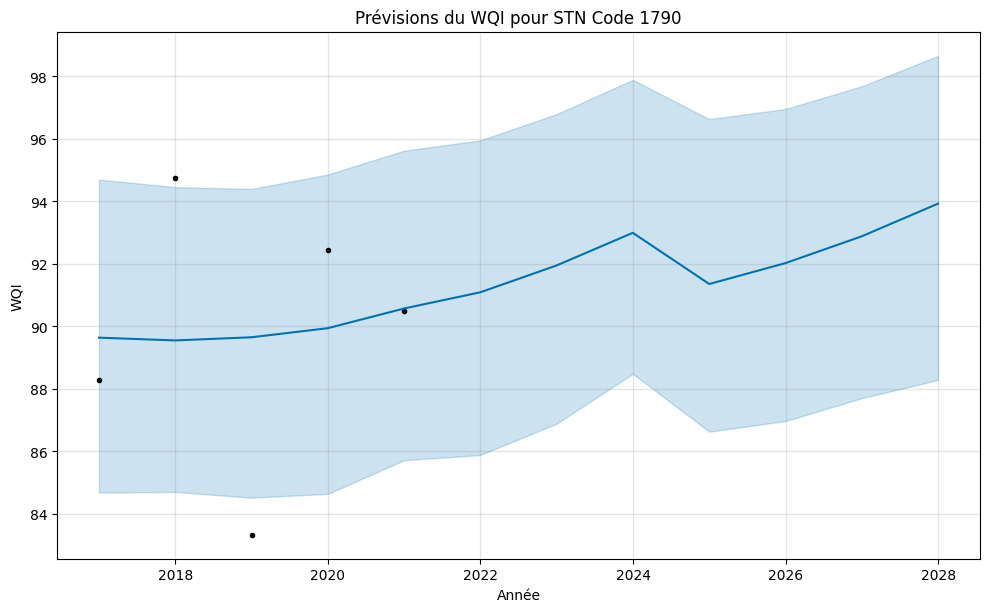

         Date  Prédiction  Limite Inférieure  Limite Supérieure
0  2017-01-01   89.640610          84.686578          94.697952
1  2018-01-01   89.552283          84.706192          94.455606
2  2019-01-01   89.653027          84.522440          94.396973
3  2020-01-01   89.943234          84.643439          94.858697
4  2021-01-01   90.574468          85.721654          95.622225
5  2021-12-31   91.091765          85.886387          95.951306
6  2022-12-31   91.949050          86.890064          96.790533
7  2023-12-31   92.993716          88.484054          97.888073
8  2024-12-31   91.356791          86.631523          96.631326
9  2025-12-31   92.025630          86.975454          96.955715
10 2026-12-31   92.882915          87.704287          97.682101
11 2027-12-31   93.927581          88.287237          98.651703


In [63]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

def evaluate_model(data, stn_code, years_future=7):
    # Filtrer les données pour le STN Code donné
    data_filtered = data[data['STN Code'] == stn_code]

    # Vérifier les données filtrées
    if data_filtered.empty:
        raise ValueError(f"Pas de données disponibles pour le STN Code {stn_code}.")

    print(f"Nombre total de données pour STN Code {stn_code}: {len(data_filtered)}")
    print("Données filtrées :")
    print(data_filtered)

    # Préparer les données
    data_filtered = data_filtered.rename(columns={'Year': 'ds', 'WQI': 'y'})
    data_filtered['ds'] = pd.to_datetime(data_filtered['ds'], format='%Y')

    # Initialiser et entraîner le modèle Prophet
    model = Prophet(yearly_seasonality=True, changepoint_prior_scale=0.1)
    model.fit(data_filtered[['ds', 'y']])

    # Faire des prévisions
    future = model.make_future_dataframe(periods=years_future, freq='Y')
    forecast = model.predict(future)

    # Retourner les prévisions sous forme de tableau
    forecast_table = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
    forecast_table.columns = ['Date', 'Prédiction', 'Limite Inférieure', 'Limite Supérieure']
    
    return model, forecast, forecast_table

# Exemple d'utilisation
stn_code = 1790
data_cleaned = pd.read_csv("water_data_final.csv")  # Charger les données
model, forecast, forecast_table = evaluate_model(data_cleaned, stn_code)

# Afficher la courbe de prévisions
model.plot(forecast)
plt.title(f"Prévisions du WQI pour STN Code {stn_code}")
plt.xlabel("Année")
plt.ylabel("WQI")
plt.show()

# Afficher le tableau des prévisions
print(forecast_table)

17:50:32 - cmdstanpy - INFO - Chain [1] start processing
17:50:32 - cmdstanpy - INFO - Chain [1] done processing


Nombre total de données pour STN Code 1790: 5
Données filtrées :
     STN Code  Dissolved Oxygen  Location Name  Year    pH  Conductivity  \
0        1790               6.0  PULICATE LAKE  2017  7.80       79935.0   
140      1790               6.3  PULICATE LAKE  2018  7.55       27935.0   
279      1790               5.2  PULICATE LAKE  2019  7.45       34865.0   
482      1790               4.3  PULICATE LAKE  2020  7.70       37960.0   
730      1790               5.1  PULICATE LAKE  2021  7.70       42450.0   

      BOD  Nitrate N + Nitrite N  Fecal Coliform  Total Coliform        WQI  \
0    1.65                  3.775             2.0          1200.0  88.277923   
140  4.35                  2.100             3.0          1350.0  94.760607   
279  2.50                  1.630             3.5           905.0  83.335358   
482  2.50                  1.095             3.0           142.5  92.451127   
730  2.60                  1.420             3.0            98.5  90.507023   

   

c:\anaconda\envs\MLOPs\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


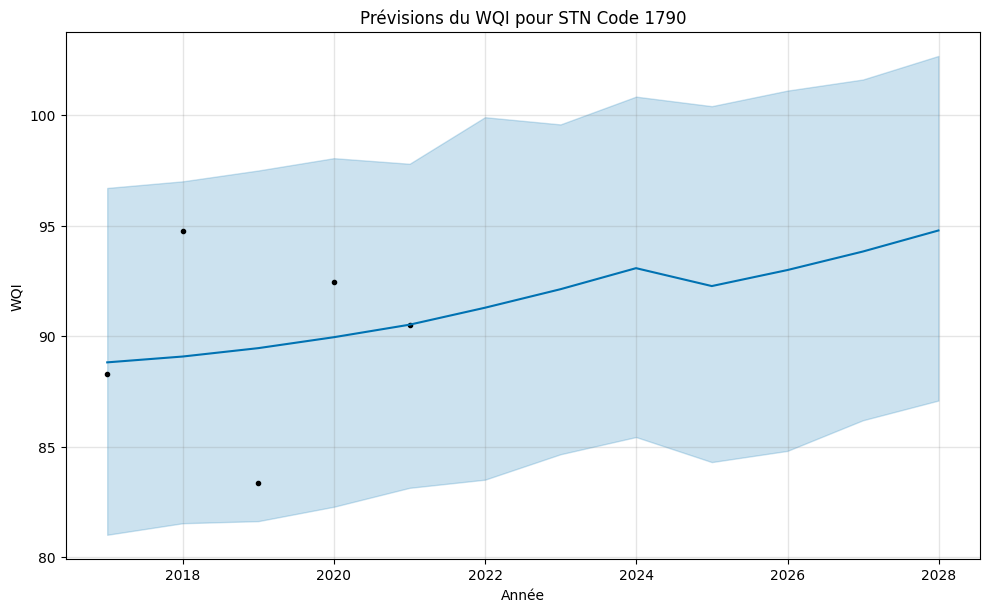

         Date  Prédiction  Limite Inférieure  Limite Supérieure
0  2017-01-01   88.808553          81.004970          96.701962
1  2018-01-01   89.073030          81.527373          97.001740
2  2019-01-01   89.452395          81.622307          97.492031
3  2020-01-01   89.946875          82.272982          98.049932
4  2021-01-01   90.514007          83.129461          97.796180
5  2021-12-31   91.280867          83.498133          99.903977
6  2022-12-31   92.119607          84.649160          99.577877
7  2023-12-31   93.071923          85.428271         100.834799
8  2024-12-31   92.261909          84.294539         100.403587
9  2025-12-31   92.986322          84.800599         101.107524
10 2026-12-31   93.825062          86.187111         101.609925
11 2027-12-31   94.777377          87.080061         102.676865


In [96]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt
from matplotlib.ticker import MaxNLocator

def evaluate_model(data, stn_code, years_future=7):
    # Filtrer les données pour le STN Code donné
    data_filtered = data[data['STN Code'] == stn_code]

    # Vérifier les données filtrées
    if data_filtered.empty:
        raise ValueError(f"Pas de données disponibles pour le STN Code {stn_code}.")

    print(f"Nombre total de données pour STN Code {stn_code}: {len(data_filtered)}")
    print("Données filtrées :")
    print(data_filtered)

    # Préparer les données
    data_filtered = data_filtered.rename(columns={'Year': 'ds', 'WQI': 'y'})
    data_filtered['ds'] = pd.to_datetime(data_filtered['ds'], format='%Y')

    # Initialiser le modèle Prophet avec des ajustements
    model = Prophet(
        changepoint_prior_scale=0.001,  # Réduire l'impact des changepoints pour rendre le modèle plus lisse
        interval_width=0.95  # Ajuster l'intervalle de confiance à 95%
    )
    model.fit(data_filtered[['ds', 'y']])

    # Faire des prévisions
    future = model.make_future_dataframe(periods=years_future, freq='Y')
    forecast = model.predict(future)

    # Retourner les prévisions sous forme de tableau
    forecast_table = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
    forecast_table.columns = ['Date', 'Prédiction', 'Limite Inférieure', 'Limite Supérieure']
    
    return model, forecast, forecast_table

# Exemple d'utilisation
stn_code = 1790
data_cleaned = pd.read_csv("water_data_final.csv")  # Charger les données
model, forecast, forecast_table = evaluate_model(data_cleaned, stn_code)

# Afficher la courbe de prévisions
fig = model.plot(forecast)
plt.title(f"Prévisions du WQI pour STN Code {stn_code}")
plt.xlabel("Année")
plt.ylabel("WQI")

# Ajuster l'échelle de l'axe Y manuellement
plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True, prune='lower', steps=[1, 2, 5, 10]))

# En option, ajuster manuellement la limite de l'axe Y si nécessaire
y_min, y_max = plt.gca().get_ylim()
plt.ylim([y_min, y_max])  # Ajuster l'échelle en fonction des données

plt.show()

# Afficher le tableau des prévisions
print(forecast_table)

c:\anaconda\envs\MLOPs\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\anaconda\envs\MLOPs\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\anaconda\envs\MLOPs\Lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency YS-JAN will be used.
  self._init_dates(dates, freq)
c:\anaconda\envs\MLOPs\Lib\site-packages\statsmodels\tsa\statespace\sarimax.py:966: UserWarning: Non-stationary starting autoregressive parameters found. Using zeros as starting parameters.
  warn('Non-stationary starting autoregressive parameters'
c:\anaconda\envs\MLOPs\Lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization fai

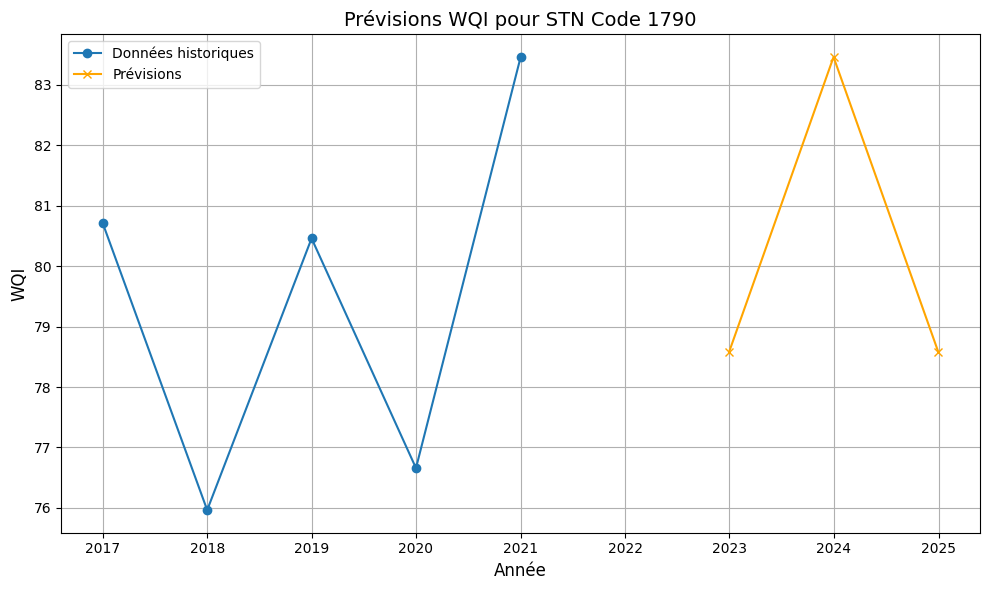

In [103]:
from statsmodels.tsa.arima.model import ARIMA
import pandas as pd
import matplotlib.pyplot as plt

# Charger vos données
data = pd.read_csv("water_data_final.csv")
data_filtered = data[data['STN Code'] == 2206]  # Utiliser le bon code

# Vérifier et préparer les données
if data_filtered.empty:
    raise ValueError("Pas de données disponibles pour ce STN Code.")

# Filtrer les colonnes pertinentes et convertir l'année en index datetime
data_filtered = data_filtered[['Year', 'WQI']].set_index('Year')
data_filtered.index = pd.to_datetime(data_filtered.index, format='%Y')

# Ajuster un modèle ARIMA
model = ARIMA(data_filtered, order=(1, 1, 1))  # Ajustez (p, d, q) selon vos données
model_fit = model.fit()

# Faire des prévisions pour les 3 prochaines années
forecast = model_fit.get_forecast(steps=3)
forecast_mean = forecast.predicted_mean  # Moyenne des prévisions

# Préparer les dates des prévisions
forecast_index = pd.date_range(start=data_filtered.index[-1] + pd.DateOffset(years=1), periods=3, freq='Y')

# Tracer les données historiques
plt.figure(figsize=(10, 6))
plt.plot(data_filtered.index, data_filtered['WQI'], label="Données historiques", marker='o')

# Tracer les prévisions
plt.plot(forecast_index, forecast_mean, label="Prévisions", color="orange", marker='x')

# Ajouter des légendes et des titres
plt.title(f"Prévisions WQI pour STN Code 1790", fontsize=14)
plt.xlabel("Année", fontsize=12)
plt.ylabel("WQI", fontsize=12)
plt.legend()
plt.grid(True)
plt.tight_layout()

# Afficher la courbe
plt.show()

C:\Users\Farah Elloumi\AppData\Local\Temp\ipykernel_10356\3595736494.py:27: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  test_data['y'] = test_data['y'] * 0.8
18:05:29 - cmdstanpy - INFO - Chain [1] start processing
18:05:29 - cmdstanpy - INFO - Chain [1] done processing


Nombre total de données pour STN Code 1790: 5
Données filtrées :
     STN Code  Dissolved Oxygen  Location Name  Year    pH  Conductivity  \
0        1790               6.0  PULICATE LAKE  2017  7.80       79935.0   
140      1790               6.3  PULICATE LAKE  2018  7.55       27935.0   
279      1790               5.2  PULICATE LAKE  2019  7.45       34865.0   
482      1790               4.3  PULICATE LAKE  2020  7.70       37960.0   
730      1790               5.1  PULICATE LAKE  2021  7.70       42450.0   

      BOD  Nitrate N + Nitrite N  Fecal Coliform  Total Coliform        WQI  \
0    1.65                  3.775             2.0          1200.0  88.277923   
140  4.35                  2.100             3.0          1350.0  94.760607   
279  2.50                  1.630             3.5           905.0  83.335358   
482  2.50                  1.095             3.0           142.5  92.451127   
730  2.60                  1.420             3.0            98.5  90.507023   

   

c:\anaconda\envs\MLOPs\Lib\site-packages\prophet\forecaster.py:1854: FutureWarning: 'Y' is deprecated and will be removed in a future version, please use 'YE' instead.
  dates = pd.date_range(


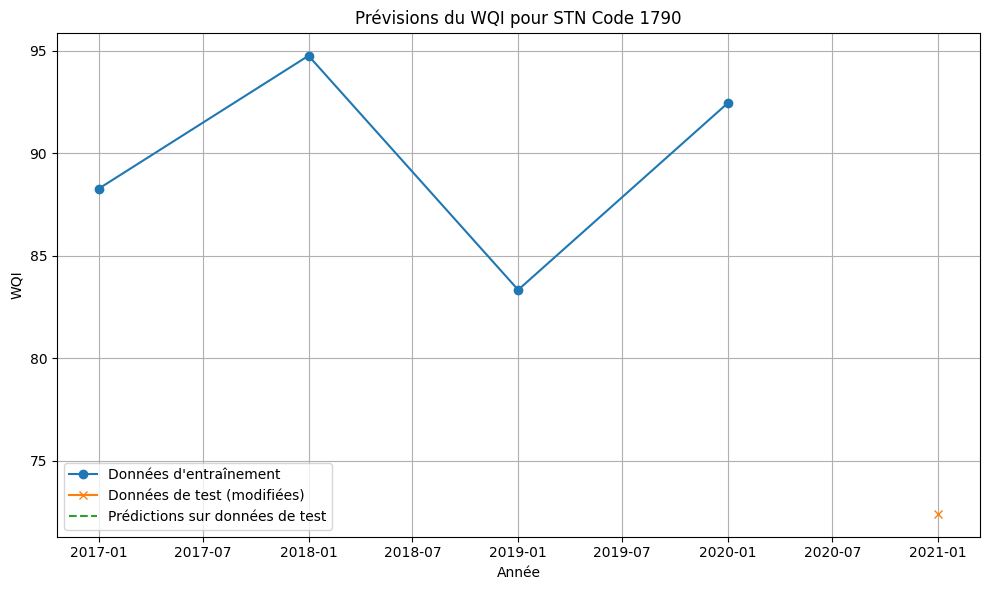

        Date  Prédiction  Limite Inférieure  Limite Supérieure
0 2017-01-01   89.614561          83.918009          95.178313
1 2018-01-01   89.574078          83.984514          95.424726
2 2019-01-01   89.677209          84.636039          95.061593
3 2020-01-01   89.925385          84.030375          95.563432
4 2020-12-31   90.319750          85.140424          95.903727


In [104]:
import pandas as pd
from prophet import Prophet
import matplotlib.pyplot as plt

def evaluate_model(data, stn_code, years_future=7, test_ratio=0.2):
    # Filtrer les données pour le STN Code donné
    data_filtered = data[data['STN Code'] == stn_code]

    # Vérifier les données filtrées
    if data_filtered.empty:
        raise ValueError(f"Pas de données disponibles pour le STN Code {stn_code}.")

    print(f"Nombre total de données pour STN Code {stn_code}: {len(data_filtered)}")
    print("Données filtrées :")
    print(data_filtered)

    # Préparer les données
    data_filtered = data_filtered.rename(columns={'Year': 'ds', 'WQI': 'y'})
    data_filtered['ds'] = pd.to_datetime(data_filtered['ds'], format='%Y')

    # Diviser les données en ensemble d'entraînement et de test
    train_size = int(len(data_filtered) * (1 - test_ratio))
    train_data = data_filtered.iloc[:train_size]
    test_data = data_filtered.iloc[train_size:]

    # Appliquer une transformation déterministe sur les données de test (par exemple multiplication par 0.8)
    test_data['y'] = test_data['y'] * 0.8

    # Initialiser et entraîner le modèle Prophet sur les données d'entraînement
    model = Prophet(yearly_seasonality=True, changepoint_prior_scale=0.1)
    model.fit(train_data[['ds', 'y']])

    # Faire des prévisions pour l'ensemble complet (train + test)
    future = model.make_future_dataframe(periods=len(test_data), freq='Y')
    forecast = model.predict(future)

    # Calculer les prédictions sur les données de test
    test_predictions = forecast.tail(len(test_data))

    # Afficher les courbes de prévisions et les résultats
    plt.figure(figsize=(10, 6))
    plt.plot(train_data['ds'], train_data['y'], label='Données d\'entraînement', marker='o')
    plt.plot(test_data['ds'], test_data['y'], label='Données de test (modifiées)', marker='x')
    plt.plot(test_predictions['ds'], test_predictions['yhat'], label='Prédictions sur données de test', linestyle='--')
    
    plt.title(f"Prévisions du WQI pour STN Code {stn_code}")
    plt.xlabel("Année")
    plt.ylabel("WQI")
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()

    # Retourner les prévisions sous forme de tableau
    forecast_table = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]
    forecast_table.columns = ['Date', 'Prédiction', 'Limite Inférieure', 'Limite Supérieure']
    
    return model, forecast, forecast_table

# Exemple d'utilisation
stn_code = 1790
data_cleaned = pd.read_csv("water_data_final.csv")  # Charger les données
model, forecast, forecast_table = evaluate_model(data_cleaned, stn_code)

# Afficher le tableau des prévisions
print(forecast_table)

In [ ]:
import pandas as pd
from prophet import Prophet
import pickle
import matplotlib.pyplot as plt
import os
import json

# Step 1: Train the model and save it as a pickle file
def train_and_save_model(data, country, pollutant, save_path="models"):
    os.makedirs(save_path, exist_ok=True)
    data['timestamp'] = pd.to_datetime(data['timestamp'])
    
    # Filter data for the specific country
    country_data = data[data['country'].str.upper() == country.upper()]
    
    # Prepare the data for Prophet
    df = country_data[['timestamp', pollutant]].rename(columns={'timestamp': 'ds', pollutant: 'y'})
    
    # Train the model
    model = Prophet()
    model.fit(df)
    
    # Save the trained model as a pickle file
    model_file = os.path.join(save_path, f"{country}_{pollutant}_prophet_model.pkl")
    with open(model_file, 'wb') as f:
        pickle.dump(model, f)
    print(f"Model saved at: {model_file}")

def plot_predictions(forecast, title="Forecast"):
    # Convert 'ds' column back to datetime format
    forecast['ds'] = pd.to_datetime(forecast['ds'])
    
    # Extracting monthly predictions
    forecast['month'] = forecast['ds'].dt.to_period('M')
    monthly_forecast = forecast.groupby('month').mean(numeric_only=True).reset_index()
    monthly_forecast['month'] = monthly_forecast['month'].dt.strftime('%b %Y')  # Format months as strings
    
    # Plotting
    plt.figure(figsize=(10, 6))
    plt.plot(monthly_forecast['month'], monthly_forecast['yhat'], marker='o', label='Predicted Value', color='blue')
    plt.fill_between(
        monthly_forecast['month'],
        monthly_forecast['yhat_lower'],
        monthly_forecast['yhat_upper'],
        color='blue',
        alpha=0.2,
        label='Uncertainty Interval'
    )
    plt.xticks(rotation=45, fontsize=10)
    plt.yticks(fontsize=10)
    plt.xlabel("Month", fontsize=12)
    plt.ylabel("Predicted Value", fontsize=12)
    plt.title(title, fontsize=14)
    plt.grid(axis='y', linestyle='--', alpha=0.7)
    plt.legend(fontsize=10)
    plt.tight_layout()
    plt.show()


# Step 2: Load the model and make predictions
def load_and_predict(model_file, periods=365):
    
    with open(model_file, 'rb') as f:
        model = pickle.load(f)
    
    future = model.make_future_dataframe(periods=periods)
    forecast = model.predict(future)
    
    # Convert 'ds' column (Timestamp) to string format
    forecast['ds'] = forecast['ds'].dt.strftime('%Y-%m-%d %H:%M:%S')
    
    # Save predictions to a JSON file
    predictions_file = model_file.replace("_prophet_model.pkl", "_forecast.json")
    forecast_json = forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].to_dict(orient='records')
    
    # Write the JSON data to a file
    with open(predictions_file, 'w') as f:
        json.dump(forecast_json, f, indent=4)
    print(f"Predictions saved to: {predictions_file}")

    plot_predictions(forecast)
    return predictions_file

# Example Usage
if _name_ == "_main_":
    # Load your dataset
    data = pd.read_csv("dataset\\air_quality_data_all_countries.csv")
    
    # Specify inputs
    country = input("Enter the country for training: ")
    pollutant = input("Enter the pollutant (e.g., no, no2, pm2_5, etc.): ")
    
    # Step 1: Train and save the model
    train_and_save_model(data, country, pollutant)
    
    # Step 2: Load the model and make predictions
    model_file = f"models/{country}_{pollutant}_prophet_model.pkl"
    if os.path.exists(model_file):
        load_and_predict(model_file, 36)
    else:
        print("Model file not found. Please train the model first.")